# RADIACIÓ SOLAR
Calcul de la radiació solar obtinguda segons els parametres meteorologics obtinguts en una regió i temps concrets.

In [2]:
#Import de les llibreries "a lo loco ostieeeee"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#lectura
radiation = pd.read_csv('SolarPrediction.csv')
radiation.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
radiation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
UNIXTime                  32686 non-null int64
Data                      32686 non-null object
Time                      32686 non-null object
Radiation                 32686 non-null float64
Temperature               32686 non-null int64
Pressure                  32686 non-null float64
Humidity                  32686 non-null int64
WindDirection(Degrees)    32686 non-null float64
Speed                     32686 non-null float64
TimeSunRise               32686 non-null object
TimeSunSet                32686 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


Podem observar que no hi ha cap columna amb valors nulls, la qual cosa està bé i tal

In [5]:
radiation.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


# Analisi de les dades

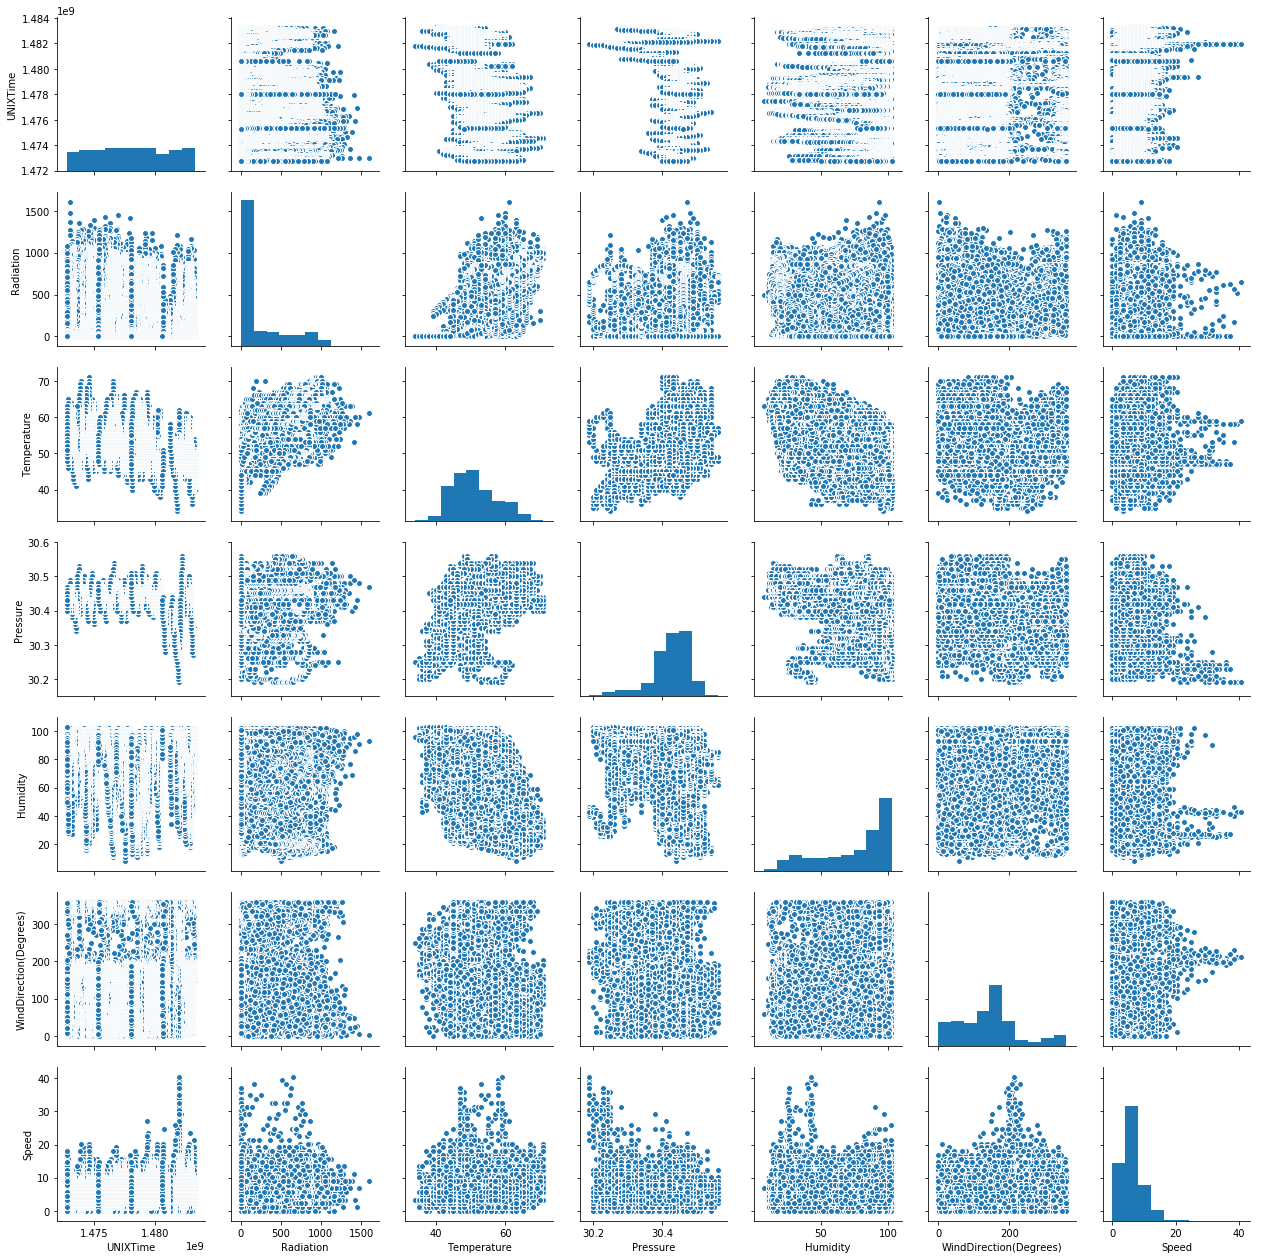

In [6]:
sns.pairplot(radiation)

Així de primeres, no és evident que hi hagi algna relació entre columnes, si més no, una de rellevant.
L'UNIXTime si que mostra algun tipo de relació amb les dades, no obstant no és pas útil per al que pretinc calcular.
Així doncs, cal descartar-ne columnes i relacionar-ne la resta amb la radiació.

In [7]:
#Eliminació de les columnes irrellevants i observació de la manca de dades:
#Considero que les dades te datetime son irrellevants per al calcul de la radiació solar:
radiation.drop('UNIXTime',axis=1,inplace=True)
radiation.drop('Data',axis=1,inplace=True)
radiation.drop('Time',axis=1,inplace=True)

#Aquesta columna s'usarà proximament com a referencia d'hores de sol:
import time
radiation['SunTime'] = 0
for x in radiation.index:
    time_rise = time.strptime(radiation.at[x, 'TimeSunRise'],'%H:%M:%S')
    int_t_rise = time_rise.tm_hour*3600 + time_rise.tm_min*60 + time_rise.tm_sec
    time_set = time.strptime(radiation.at[x, 'TimeSunSet'],'%H:%M:%S')
    int_t_set = time_set.tm_hour*3600 + time_set.tm_min*60 + time_set.tm_sec
    radiation.at[x, 'SunTime'] = int_t_set - int_t_rise
    
radiation.drop('TimeSunSet',axis=1,inplace=True)
radiation.drop('TimeSunRise',axis=1,inplace=True)
    
#sns.pairplot(radiation)
radiation.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunTime
0,1.21,48,30.46,59,177.39,5.62,43200
1,1.21,48,30.46,58,176.78,3.37,43200
2,1.23,48,30.46,57,158.75,3.37,43200
3,1.21,48,30.46,60,137.71,3.37,43200
4,1.17,48,30.46,62,104.95,5.62,43200


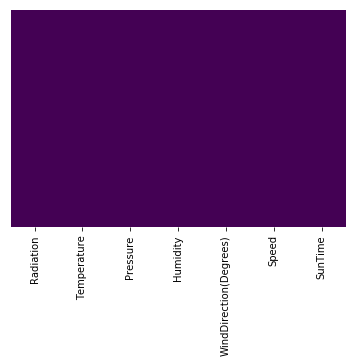

In [8]:
#La resta de dades, d'origen metereologic, poden afectar a les lectures i per tant no se les pot obiar.
sns.heatmap(radiation.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Podem observar com no hi falten dades en cap fila ni columna. La qual cosa és la OOOOSTIA! Menys feina.

# Observació de les correlacions

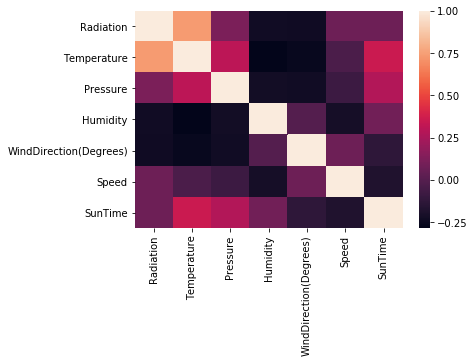

In [9]:
sns.heatmap(radiation.corr())

#És més que evident que temperatura i radiació tenen un relació directa.
#Malgrat això, no n'és suficient per calcular-ne un valor apropiat.
#La humitat i el vent, per exemple, aporten una relació inversa. Per tant, són significants.

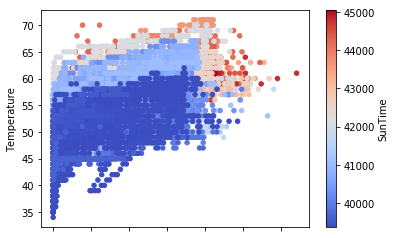

In [16]:
radiation.plot.scatter(x='Radiation',y='Temperature', c='SunTime', cmap='coolwarm')

In [11]:
#Toca assignar quines columnes són les que aporten dades entratns i quina és la de dades resultants.
#Evidentment, la de dades resultants és la columna de Radiation, que és això el que volem calcular.
#La resta, són les rellevants per al calcul, doncs les innecessaries les he eliminat anteriorment.
X = radiation[['Temperature', 'Pressure', 'Humidity',
               'WindDirection(Degrees)', 'Speed', 'SunTime']]
Y = radiation['Radiation']

In [12]:
#import d'una llibreria toh loca
from sklearn.model_selection import train_test_split

In [13]:
#Preparació dels set d'entrenament i comprovació
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

#En un principi havia decidit usar test_size = 0.3, no obstant ha resultat ser més efectiu un size de 0.4.

# Regresió lineal

In [14]:
from sklearn.linear_model import LinearRegression
regressio = LinearRegression()
regressio.fit(X_train,Y_train)
#obtenció del interceptor pertinent a la regressió
print(regressio.intercept_)

15163.544437544182


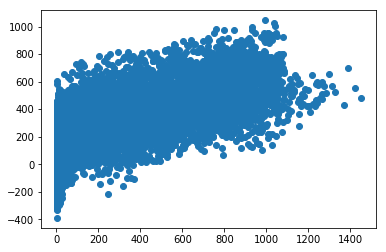

In [15]:
#comprovació de l'eficiencia de la predicció
predict = regressio.predict(X_test)
plt.scatter(Y_test,predict)

#Com es pot observar, la dispersió és molt elevada, la qual cosa posa en dubte la precisió del model.

# Deducció de la radiació en rangs
Ara bé, en lloc de demanar-li al sistema que m'obtingui el nivell de radiació exacte, probaré que em distingeixi rangs.
Par a fer aixó, doncs, he de crear una nova columna on s'indiqui indiqui la categoria segons la radiació.
Les categories son: 0(baixa), 1(mitjana), 2(alta), 3(extrema)

In [16]:
radiation['level'] = '0'
for x in radiation.index:
    radiation.at[x, 'level'] = '0' if radiation.at[x, 'Radiation'] < 400.0375 else '1' if radiation.at[x, 'Radiation'] < 800.075 else '2' if radiation.at[x, 'Radiation'] < 1200.1125 else '3'

radiation.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunTime,level
0,1.21,48,30.46,59,177.39,5.62,43200,0
1,1.21,48,30.46,58,176.78,3.37,43200,0
2,1.23,48,30.46,57,158.75,3.37,43200,0
3,1.21,48,30.46,60,137.71,3.37,43200,0
4,1.17,48,30.46,62,104.95,5.62,43200,0


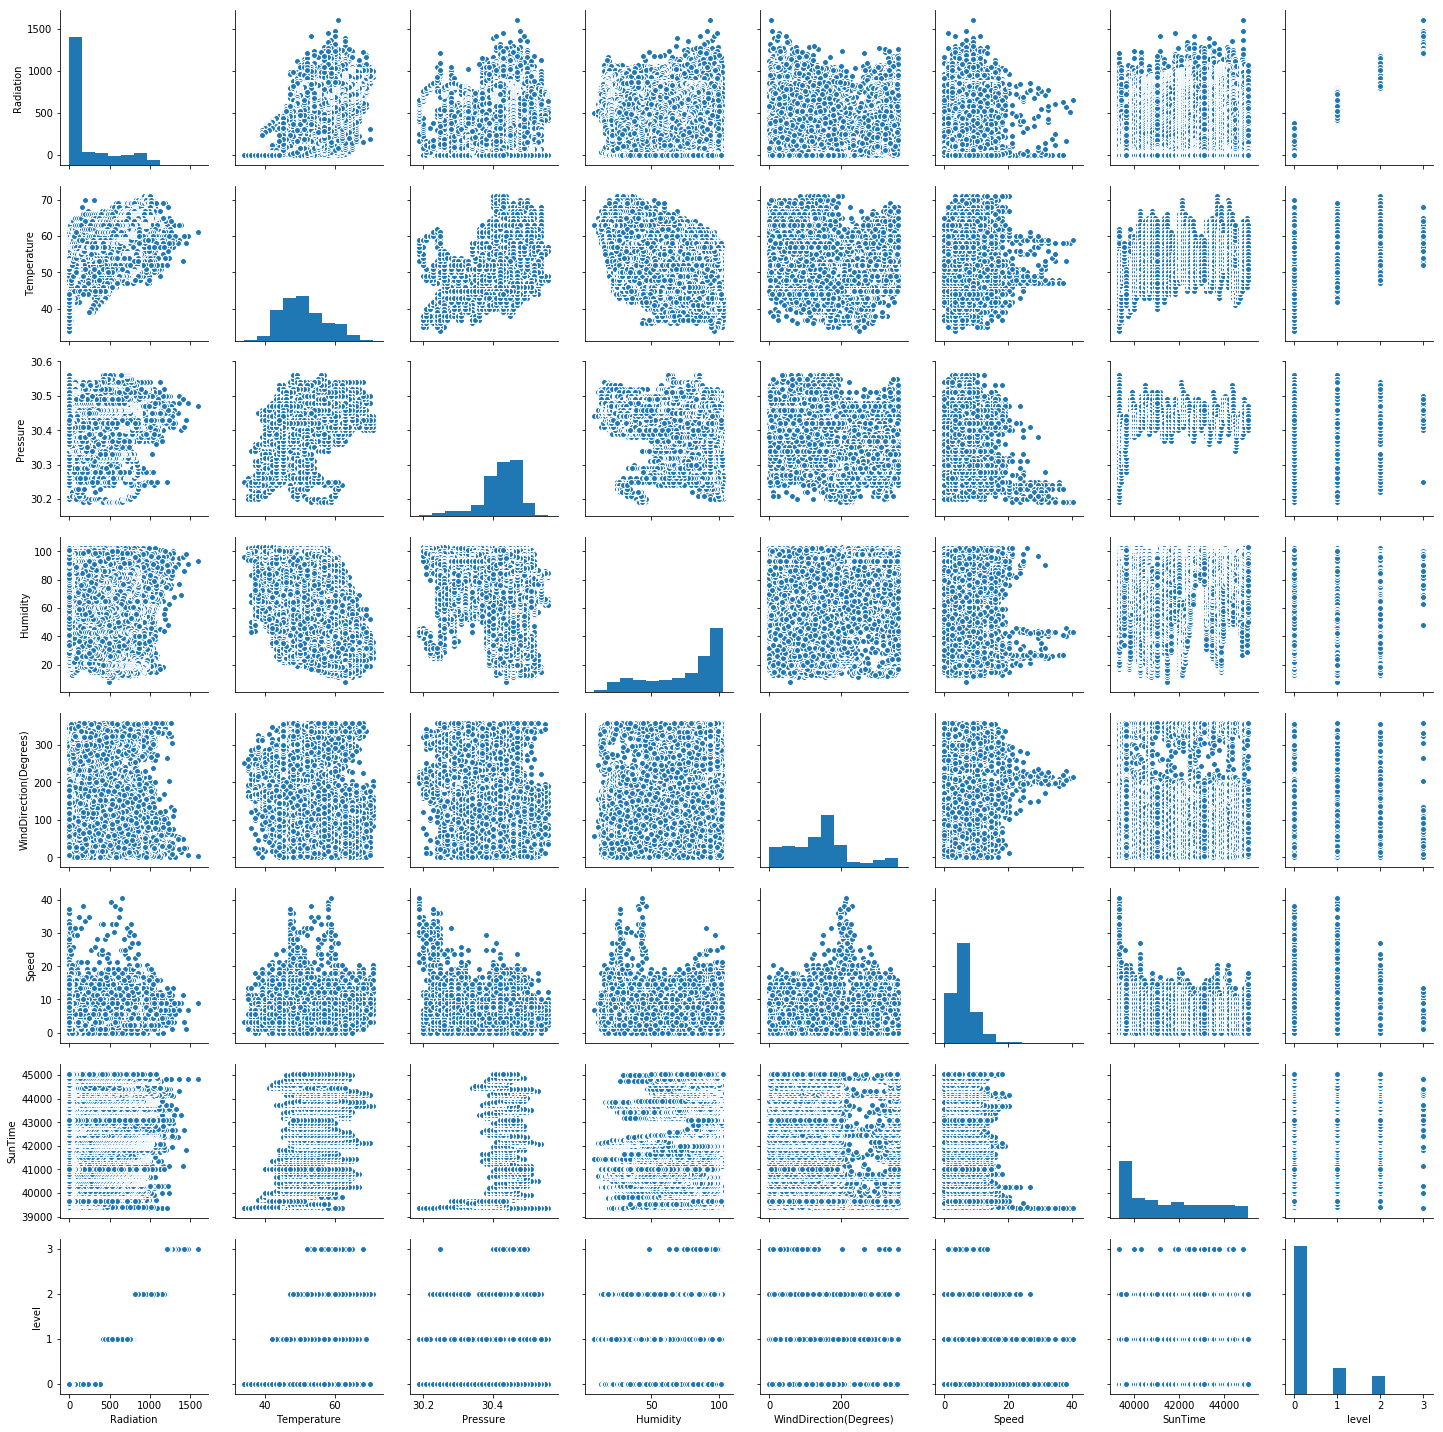

In [17]:
sns.pairplot(radiation)

Evidentment, la X per al nou learning serà el mateix que en el cas anterior.
Altrament, la Y ha de canviar. Doncs ara, enlloc de la radiació, en volen predir la categoria.

In [18]:
X = radiation[['Temperature', 'Pressure', 'Humidity',
               'WindDirection(Degrees)', 'Speed', 'SunTime']]
Y = radiation['level']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Decision Tree VS Random Forest

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Anteriorment he provat d'usar un Decision Tree però ha donat una precisió inferior al 60%, poc eficient.
Tot i que el Random forest no té una bona precisió que diguem, al menys supera l'anterior.

# Procedim a la predicció

In [21]:
TreePrediction = tree.predict(X_test)
ForestPrediction = forest.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print('Cas del Decision Tree')
print(classification_report(Y_test,TreePrediction))
print('\n')
print('Cas del Random Forest')
print(classification_report(Y_test,ForestPrediction))

Cas del Decision Tree
             precision    recall  f1-score   support

          0       0.94      0.95      0.95      7517
          1       0.61      0.60      0.61      1329
          2       0.73      0.69      0.71       942
          3       0.00      0.00      0.00        18

avg / total       0.87      0.88      0.88      9806



Cas del Random Forest
             precision    recall  f1-score   support

          0       0.94      0.97      0.96      7517
          1       0.69      0.62      0.65      1329
          2       0.79      0.70      0.74       942
          3       0.33      0.06      0.10        18

avg / total       0.89      0.90      0.89      9806



In [23]:
print('Cas del Decision Tree')
print(confusion_matrix(Y_test,TreePrediction))
print('\n')
print('Cas del Random Forest')
print(confusion_matrix(Y_test,ForestPrediction))

Cas del Decision Tree
[[7149  294   72    2]
 [ 362  796  169    2]
 [  83  202  653    4]
 [   3   10    5    0]]


Cas del Random Forest
[[7317  170   30    0]
 [ 367  825  135    2]
 [  94  193  655    0]
 [   5    7    5    1]]


# Resultats

## És evident, tot i que no per massa, que el random forest és més encertat per a la classificació.
No obstant vull senyalar que m'he vist obligat a fer equidistants els rangs de la classificació.
En un principi, usant com a valors de referencia els percentatges mostrats pel radiation.describe()
el Decision Tree amb prou feines tenia una precisió del 59%, mentre que el random forest del 63%.

També cal puntualitzar que, a diferencia del que pensava en un primer moment, el SunTime si que és rellevant.
De fet, en afegir el SunTime als testos la precisió ha augmentat un 4% a ambdos models.

# K Means
En un 'arrebato de locura' he decidit provar el K Means per aquest cas de clasificació:

In [24]:
radiation.drop('level',axis=1,inplace=True)

from sklearn.cluster import KMeans
camins = KMeans(n_clusters=4) #jojojo 
camins.fit(radiation)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
radiation.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunTime
0,1.21,48,30.46,59,177.39,5.62,43200
1,1.21,48,30.46,58,176.78,3.37,43200
2,1.23,48,30.46,57,158.75,3.37,43200
3,1.21,48,30.46,60,137.71,3.37,43200
4,1.17,48,30.46,62,104.95,5.62,43200


# Evaluació del cas

In [26]:
camins.cluster_centers_

array([[1.60406098e+02, 4.77730773e+01, 3.03929423e+01, 8.02008824e+01,
        1.60949375e+02, 6.87520720e+00, 3.95810745e+04],
       [2.39138829e+02, 5.35376009e+01, 3.04389718e+01, 7.62709248e+01,
        1.26538184e+02, 5.74146155e+00, 4.25309673e+04],
       [2.21392209e+02, 5.37549952e+01, 3.04362607e+01, 8.09927054e+01,
        1.38340568e+02, 5.37956866e+00, 4.42384110e+04],
       [2.35990365e+02, 5.16938144e+01, 3.04419536e+01, 6.12953608e+01,
        1.37091845e+02, 6.46296005e+00, 4.09128711e+04]])

Com és pot veure, hi ha un total de 4 punts de 7 dimensions. És a dir, ha distingit 4 categories.

In [27]:
camins.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)